<a href="https://colab.research.google.com/github/josearevalobezic/coin_flip_simulation_and_analysis/blob/main/flip_a_coin_simulation_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(123) #if we want to establish consistency on our analysis, this function is an option.

In [103]:
#programming a flipping coin

coin = np.random.randint(0,2) #will return a number between 0 (heads) or 1 (tails)

if coin == 0:
  print("heads")
else:
  print("tails")

tails


Total amount of tails after flipping the coin 10000 times=  5049
Total amount of heads after flipping the coin 10000 times= 4951
Average amount of tails=  5.049


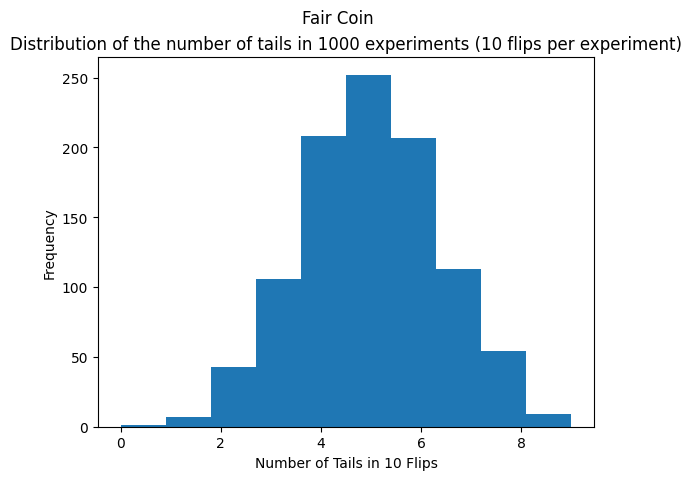

In [110]:
#analizando  flipping fair coins distribution

#listing final tails count on each experiment
final_tails = []

#establish a considerable amount of experiments, aiming a representative sample. each experiment consists on rolling the dice 10 times
amount_of_experiments = 1000
flips_per_experiment = 10

for flip in range(amount_of_experiments): #repeat the following the amount of times in the range

  tails = [0] #listing tails sum

  for x in range(flips_per_experiment) : #simulating ten  coin throws per experiment
    coin = np.random.randint(0,2) #random number between 0 or 1
    tails.append(tails[x] + coin) #adding the result to the tails list
  final_tails.append(tails[-1])#adding the final count to final_tails





print("Total amount of tails after flipping the coin",amount_of_experiments*flips_per_experiment,"times= " ,np.sum(final_tails))
print("Total amount of heads after flipping the coin",amount_of_experiments*flips_per_experiment,"times=", amount_of_experiments*flips_per_experiment - np.sum(final_tails))
print("Average amount of tails= " ,np.mean(final_tails))


plt.hist(final_tails, bins = flips_per_experiment)
plt.title(f"Distribution of the number of tails in {amount_of_experiments} experiments ({flips_per_experiment} flips per experiment)")
plt.suptitle("Fair Coin")
plt.xlabel("Number of Tails in 10 Flips")
plt.ylabel("Frequency")
plt.show()

Total amount of tails after flipping the coin 10000 times=  7042
Total amount of heads after flipping the coin 10000 times= 2958
Average amount of tails=  7.042


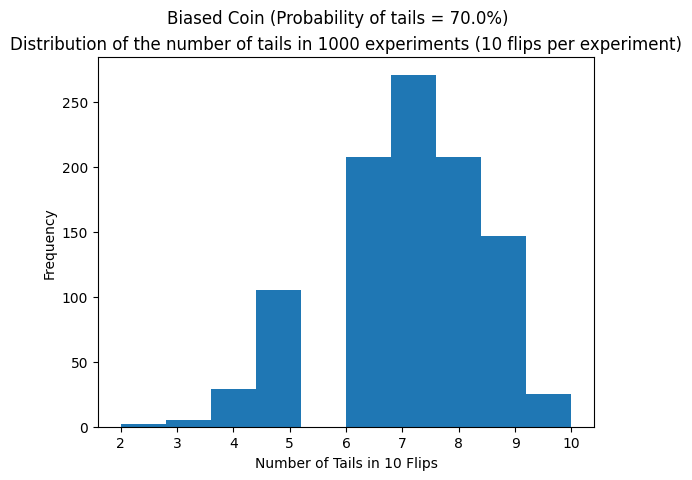

In [111]:
#analizando the distribution with biased coins

final_tails = []

# Define the probability of getting tails
probability_tails = 0.7

amount_of_experiments = 1000
flips_per_experiment = 10


for x in range(amount_of_experiments): #establish a considerable amount of experiments, aiming a representative sample

  tails = [0] #listing tails sum

  for x in range(flips_per_experiment) : #simulating ten  coin throws per experiment
    random_number = np.random.rand() #random number between 0 and 1

    if random_number < probability_tails: #when random number is bellow the probability established for the tricked coin it will be tail
      coin = 1 # Tail
    else:
      coin = 0 # Head
    tails.append(tails[x] + coin) #adding the result to the tails list
  final_tails.append(tails[-1])




print("Total amount of tails after flipping the coin",amount_of_experiments*flips_per_experiment,"times= " ,np.sum(final_tails))
print("Total amount of heads after flipping the coin",amount_of_experiments*flips_per_experiment,"times=", amount_of_experiments*flips_per_experiment - np.sum(final_tails))
print("Average amount of tails= " ,np.mean(final_tails))


plt.hist(final_tails, bins = flips_per_experiment)
plt.title(f"Distribution of the number of tails in {amount_of_experiments} experiments ({flips_per_experiment} flips per experiment)")
plt.suptitle(f"Biased Coin (Probability of tails = {probability_tails*100}%)")
plt.xlabel("Number of Tails in 10 Flips")
plt.ylabel("Frequency")
plt.show()

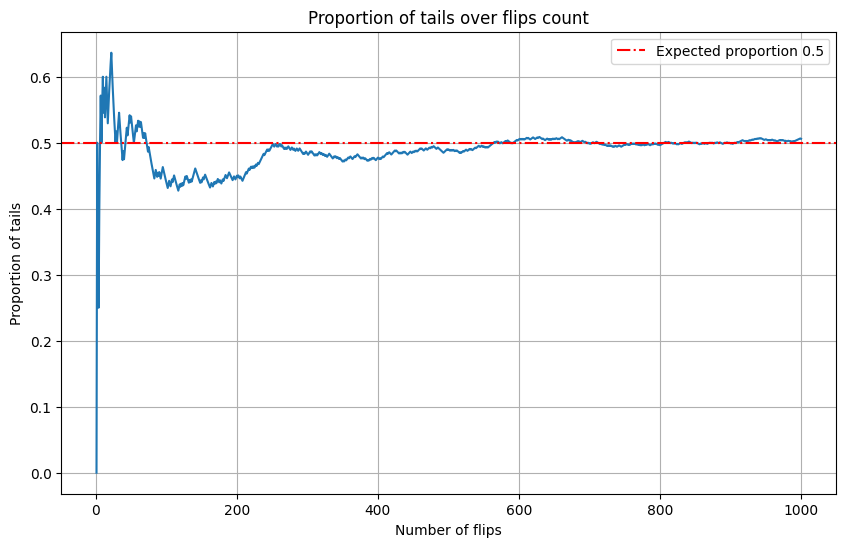

In [106]:
#analazing proportion change over more coin flips
#removing outer loop for this analysis
#store the cumulative number of tails after each flip
cumulative_tails = [0]

#simulating 1000 flips
for flip in range(1000):
  coin = np.random.randint(0,2)
  cumulative_tails.append(cumulative_tails[-1] + coin)#after each coin flip, update cumulative_tails

#cumulative_tails now contains the total number of tails after each flip, including initial 0. Remove the initial 0 if we want the cumulative after each flip from 1 to 1000

cumulative_tails_array = np.array(cumulative_tails)
flip_count = np.arange(1,1001)
proportion_tails = cumulative_tails_array[1:]/flip_count #removing 0 with [:1]

plt.figure(figsize=(10, 6))
plt.plot(flip_count, proportion_tails)
plt.xlabel("Number of flips")
plt.ylabel("Proportion of tails")
plt.title("Proportion of tails over flips count")
plt.axhline(0.5, color="red", linestyle="-.", label="Expected proportion 0.5")
plt.legend()
plt.grid(True)
plt.show()

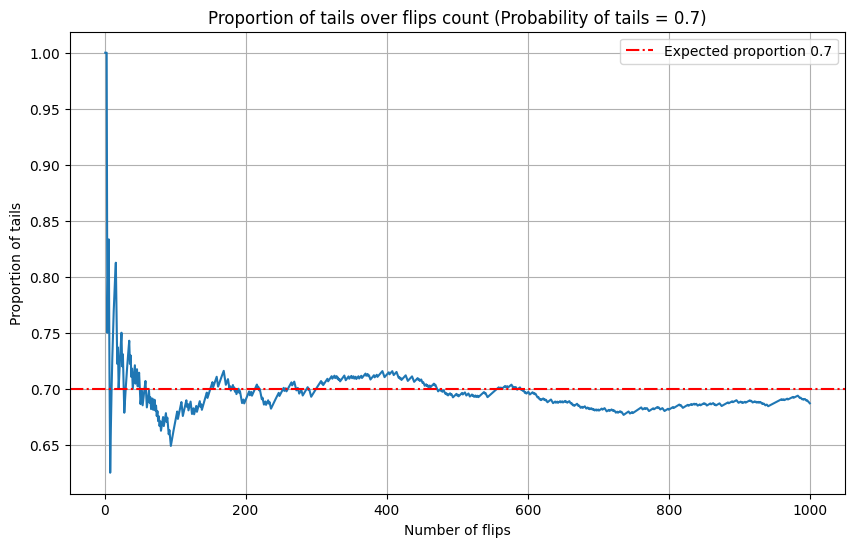

In [107]:
#analyzing proportion changes over flips with a tricked coin

# Define the probability of getting tails (e.g., 60%)
probability_tails = 0.7

# Number of flips
num_flips = 1000

cumulative_tails = [0]

for flip in range(num_flips):
  # Generate a random number between 0 and 1
  random_number = np.random.rand()

  # If the random number is less than the probability_tails, consider it a tail (1)
  if random_number < probability_tails:
    result = 1 # Tail
  else:
    result = 0 # Head

  cumulative_tails.append(cumulative_tails[-1] + result)

# Calculate the proportion of tails over flips count
cumulative_tails_array = np.array(cumulative_tails)
flip_count = np.arange(1, num_flips + 1)
proportion_tails = cumulative_tails_array[1:] / flip_count


plt.figure(figsize=(10, 6))
plt.plot(flip_count, proportion_tails)
plt.xlabel("Number of flips")
plt.ylabel("Proportion of tails")
plt.title(f"Proportion of tails over flips count (Probability of tails = {probability_tails})")
plt.axhline(probability_tails, color="red", linestyle="-.", label=f"Expected proportion {probability_tails}")
plt.legend()
plt.grid(True)
plt.show()